# CNN Model

C:\Users\hoabu\PycharmProjects\pythonProject\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 463ms/step - accuracy: 0.4908 - loss: 1.3280 - val_accuracy: 0.6946 - val_loss: 1.0337
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 428ms/step - accuracy: 0.9183 - loss: 0.2499 - val_accuracy: 0.7595 - val_loss: 1.1953
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 433ms/step - accuracy: 0.9230 - loss: 0.2132 - val_accuracy: 0.7703 - val_loss: 1.1266
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 421ms/step - accuracy: 0.9415 - loss: 0.1436 - val_accuracy: 0.7000 - val_loss: 1.6368
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 417ms/step - accuracy: 0.9457 - loss: 0.1410 - val_accuracy: 0.7324 - val_loss: 1.4414
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 426ms/step - accuracy: 0.9587 - loss: 0.1079 - val_accuracy: 0.7757 - val_loss: 1.3368
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 422ms/step - accuracy: 0.9333 - loss: 0.1808 - val_accuracy: 0.7486 - val_loss: 1.4739
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 450ms/step - accuracy: 0.9403 - loss: 0.1379 - val_accu

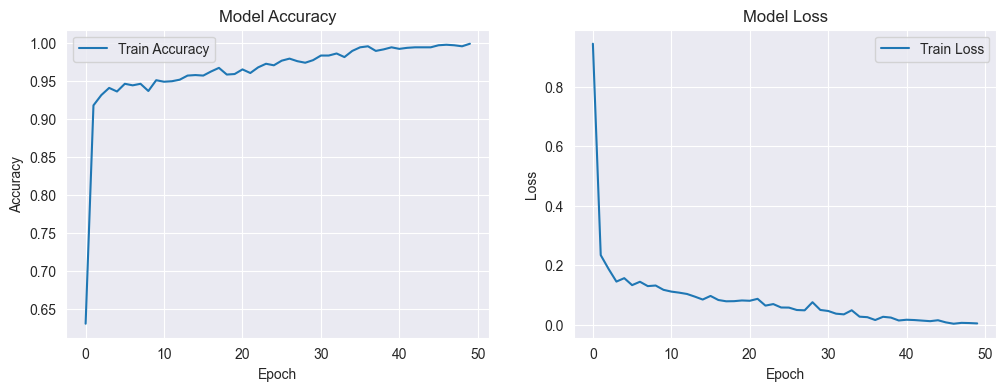

Time taken for training: 1017.21 seconds
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.9256 - loss: 0.5471
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step


Test accuracy: 0.8458244204521179
Time taken for testing: 1.59 seconds
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.76      0.84      0.80        63
     Class 1       0.85      0.92      0.88       179
     Class 2       0.82      0.86      0.84       133
     Class 3       1.00      0.67      0.81        92

    accuracy                           0.85       467
   macro avg       0.86      0.83      0.83       467
weighted avg       0.86      0.85      0.84       467



In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import time
from sklearn.metrics import classification_report

class CXRModel:
    def __init__(self, train_images_dir, train_labels_dir, test_images_dir, test_labels_dir, num_classes, image_height=150, image_width=150):
        self.train_images_dir = train_images_dir
        self.train_labels_dir = train_labels_dir
        self.test_images_dir = test_images_dir
        self.test_labels_dir = test_labels_dir
        self.image_height = image_height
        self.image_width = image_width
        self.num_classes = num_classes
        self.model = None

    def load_data(self, images_dir, labels_dir):
        images = []
        labels = []
        for image_file in os.listdir(images_dir):
            if image_file.endswith('.jpg'):
                label_file = image_file.replace('.jpg', '.txt')
                label_path = os.path.join(labels_dir, label_file)
                if os.path.exists(label_path):
                    with open(label_path, 'r') as f:
                        label_data = f.readline().strip().split()
                        if len(label_data) > 0:
                            label = int(label_data[0])  
                            image_path = os.path.join(images_dir, image_file)
                            image = load_img(image_path, target_size=(self.image_height, self.image_width))
                            image = img_to_array(image) / 255.0
                            images.append(image)
                            labels.append(label)
        return np.array(images), np.array(labels)

    def build_model(self):
        self.model = models.Sequential([
            layers.Conv2D(32, (3, 3), activation='relu', input_shape=(self.image_height, self.image_width, 3)),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Conv2D(64, (3, 3), activation='relu'),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Conv2D(128, (3, 3), activation='relu'),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Flatten(),
            layers.Dense(128, activation='relu'),
            layers.Dense(self.num_classes, activation='softmax')  
        ])

        # Biên dịch mô hình
        self.model.compile(optimizer='adam',
                           loss='categorical_crossentropy',  
                           metrics=['accuracy'])

    def train(self, epochs=50):
        X_train, y_train = self.load_data(self.train_images_dir, self.train_labels_dir)
        y_train = to_categorical(y_train, num_classes=self.num_classes)  
        start_time = time.time()
        history = self.model.fit(X_train, y_train, epochs=epochs, validation_split=0.2)
        training_time = time.time() - start_time

        self.plot_history(history)
        print(f'Time taken for training: {training_time:.2f} seconds')

    def evaluate(self):
        X_test, y_test = self.load_data(self.test_images_dir, self.test_labels_dir)
        y_test_categorical = to_categorical(y_test, num_classes=self.num_classes)  
        start_time = time.time()
        test_loss, test_acc = self.model.evaluate(X_test, y_test_categorical)
        testing_time = time.time() - start_time

        y_pred = self.model.predict(X_test)
        y_pred_classes = np.argmax(y_pred, axis=1) 

        print(f'Test accuracy: {test_acc}')
        print(f'Time taken for testing: {testing_time:.2f} seconds')
        print("Classification Report:")
        print(classification_report(y_test, y_pred_classes, target_names=[f'Class {i}' for i in range(self.num_classes)]))

    def plot_history(self, history):
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Train Accuracy')
        plt.title('Model Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Train Loss')
        plt.title('Model Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        plt.show()

    def save_model(self, model_path='CNN_alone.h5'):
        self.model.save(model_path)

num_classes = 4
train_images_dir = 'D:\\Introduction for AI\\AIFinal\\data\\Lung_CT_Scan\\train\\images'
train_labels_dir = 'D:\\Introduction for AI\\AIFinal\\data\\Lung_CT_Scan\\train\\labels'
test_images_dir = 'D:\\Introduction for AI\\AIFinal\\data\\Lung_CT_Scan\\valid\\images'
test_labels_dir = 'D:\\Introduction for AI\\AIFinal\\data\\Lung_CT_Scan\\valid\\labels'

# Khởi tạo mô hình
cxr_model = CXRModel(train_images_dir, train_labels_dir, test_images_dir, test_labels_dir, num_classes)
cxr_model.build_model()
cxr_model.train(epochs=50)
cxr_model.evaluate()
cxr_model.save_model()